# NLP Assignment 1 (40% of grade): Sentiment Analysis from Tweets

This coursework will involve you implementing functions for a text classifier, which you will train to identify the **sentiment expressed in a text** in a dataset of approx. 27,000 entries, which will be split into a 80%/20% training/test split. 

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question. **NB:** this report is strictly limited to 2 pages, and any additional pages will not be considered during marking. You are expected to write concisely within the 2 pages, and any additional texts beyond this will not be considered as part of the report.

In [1]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np

In [2]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path) as f:
        reader = csv.reader(f, delimiter="\t")
        for line in reader:
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))


def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for text, label in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)), label))
    for text, label in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)), label))


def parse_data_line(data_line):
    """Return a tuple of the label as just FAKE or REAL and the statement"""
    return (data_line[1], data_line[2])


def pre_process(text):
    """Return a list of tokens"""
    return text.split()

In [3]:
# test
text = "RT @colonelkickhead: Another bloody instant restaurant week?!?! Seriously! They just jumped the shark riding two other sharks powered by sh…"
pre_process(text)

['RT',
 '@colonelkickhead:',
 'Another',
 'bloody',
 'instant',
 'restaurant',
 'week?!?!',
 'Seriously!',
 'They',
 'just',
 'jumped',
 'the',
 'shark',
 'riding',
 'two',
 'other',
 'sharks',
 'powered',
 'by',
 'sh…']

# Question 1: Basic Feature Extraction (10 marks)

In [ ]:
global_feature_dict = {}  # A global dictionary of features


def to_feature_vector(tokens):
    """Convert a list of tokens into a feature vector (dict of token counts)."""
    feature_vector = {}

    for token in tokens:
        if token not in global_feature_dict:
            global_feature_dict[token] = len(global_feature_dict)

        idx = global_feature_dict[token]
        feature_vector[idx] = feature_vector.get(idx, 0) + 1

    return feature_vector

In [5]:
# TRAINING AND VALIDATING OUR CLASSIFIER


def train_classifier(data):
    print("Training Classifier...")
    pipeline = Pipeline([("svc", LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Question 2: Cross-validation (20 marks)

In [6]:
# solution
from sklearn.metrics import classification_report


def cross_validate(dataset, folds):
    cv_results = {"precision": [], "recall": [], "f1-score": [], "accuracy": []}
    fold_size = int(len(dataset) / folds) + 1

    for i in range(0, len(dataset), int(fold_size)):
        print("Fold start on items %d - %d" % (i, i + fold_size))

        train_set = dataset[:i] + dataset[i + fold_size :]
        test_set = dataset[i : i + fold_size]
        test_features, test_labels = zip(*test_set)

        classifier = train_classifier(train_set)
        predictions = predict_labels(test_features, classifier)

        report = classification_report(test_labels, predictions, output_dict=True)
        cv_results["precision"].append(report["weighted avg"]["precision"])
        cv_results["recall"].append(report["weighted avg"]["recall"])
        cv_results["f1-score"].append(report["weighted avg"]["f1-score"])
        cv_results["accuracy"].append(report["accuracy"])

    cv_results = {k: np.mean(v) for k, v in cv_results.items()}
    return cv_results

In [7]:
# PREDICTING LABELS GIVEN A CLASSIFIER


def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)


def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(pre_process(sample)))

In [8]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'sentiment-dataset.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
104038
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
104038


In [9]:
cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Fold start on items 0 - 2684
Training Classifier...
Fold start on items 2684 - 5368
Training Classifier...
Fold start on items 2684 - 5368
Training Classifier...
Fold start on items 5368 - 8052
Training Classifier...
Fold start on items 5368 - 8052
Training Classifier...
Fold start on items 8052 - 10736
Training Classifier...
Fold start on items 8052 - 10736
Training Classifier...
Fold start on items 10736 - 13420
Training Classifier...
Fold start on items 10736 - 13420
Training Classifier...
Fold start on items 13420 - 16104
Training Classifier...
Fold start on items 13420 - 16104
Training Classifier...
Fold start on items 16104 - 18788
Training Classifier...
Fold start on items 16104 - 18788
Training Classifier...
Fold start on items 18788 - 21472
Training Classifier...
Fold start on items 18788 - 21472
Training Classifier...
Fold start on items 21472 - 24156
Training Classifier...
Fold start on items 21472 - 24156
Training Classifier...
Fold start on items 24156 - 26840
Training Cla

{'precision': np.float64(0.8272049547684421),
 'recall': np.float64(0.8288260276810597),
 'f1-score': np.float64(0.8273565062568325),
 'accuracy': np.float64(0.8288260276810597)}

# Question 3: Error Analysis (20 marks)

In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    # cm = metrics.confusion_matrix(y_test, preds, labels)
    cm = metrics.confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

Training Classifier...


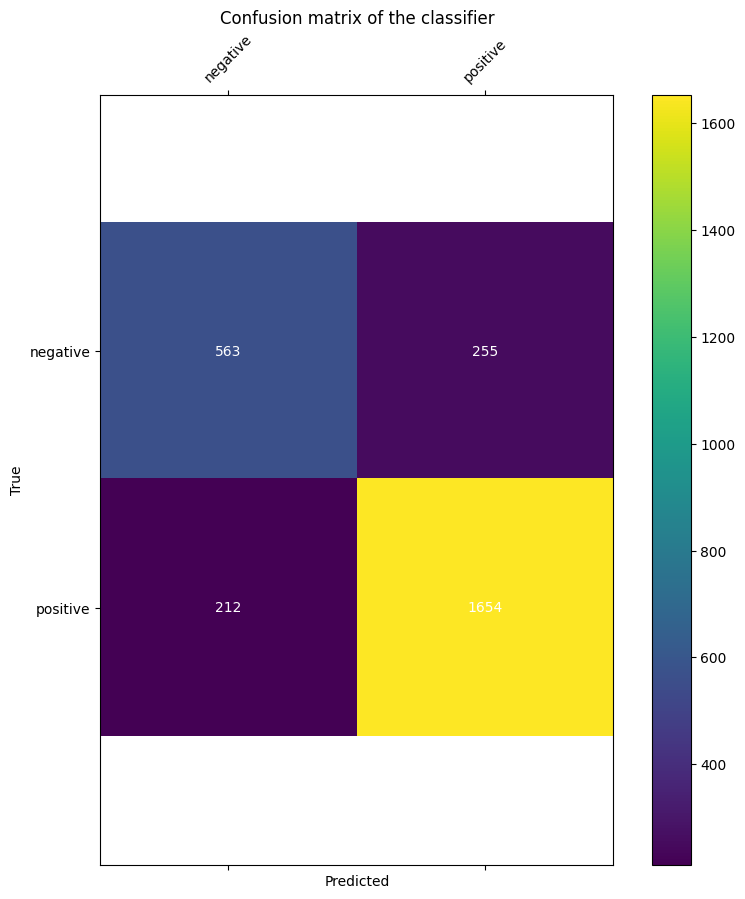

TRUE: positive PREDICTED: negative TEXT: They made a sky zone here in Covina across the street from the AMC. I'm definitely going sunday!(: who's down?
TRUE: positive PREDICTED: negative TEXT: Let me be the 1st to say it... you people are about to be all over this Weeknd album. Especially the Dark Times song w/ Ed Sheeran
TRUE: positive PREDICTED: negative TEXT: @nicki_belles @Siggy116 @Jgrizam22 @bryantbreck I like the attitude Nicki. I'm gonna do it tomorrow. If I figure out how to do it lol
TRUE: positive PREDICTED: negative TEXT: @CassieLeuffen Chuck Norris and 10,000 people march through downtown Birmingham Saturday and @OANN doesn't cover it? Who dropped the ball?
TRUE: positive PREDICTED: negative TEXT: @hunkerdad @Liz_Cheney If the election were held tomorrow, I'd only vote for Bernie Sanders.
TRUE: positive PREDICTED: negative TEXT: Sundays vlog is processing, Monday's is exporting... You know for having to do it all on a iPad is say I'm doing pretty good.
TRUE: positive PREDI

In [11]:
fold_size = int(len(train_data)/10) + 1
train_set = train_data[fold_size:]
test_set = train_data[:fold_size]
test_features, test_labels = zip(*test_set)

classifier = train_classifier(train_set)
predictions = predict_labels(test_features, classifier)

confusion_matrix_heatmap(test_labels, predictions, labels=['negative', 'positive'])

positive_error_features = {}
for i in range(len(test_features)):
    if test_labels[i] != predictions[i] and test_labels[i] == "positive":
        original_text = raw_data[i][0]
        print("TRUE:", test_labels[i], "PREDICTED:", predictions[i], "TEXT:", original_text)
        for k in test_features[i]:
            positive_error_features[k] = positive_error_features.get(k, test_features[i][k]) + 1

negative_error_features = {}
for i in range(len(test_features)):
    if test_labels[i] != predictions[i] and test_labels[i] == "negative":
        original_text = raw_data[i][0]
        print("TRUE:", test_labels[i], "PREDICTED:", predictions[i], "TEXT:", original_text)
        for k in test_features[i]:
            negative_error_features[k] = negative_error_features.get(k, test_features[i][k]) + 1

idx_to_feature = {v: k for k, v in global_feature_dict.items()}
print("Most common error features:")
for idx, count in sorted(positive_error_features.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{idx_to_feature[idx]}: {count}")
for idx, count in sorted(negative_error_features.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{idx_to_feature[idx]}: {count}")

# Question 4: Optimising pre-processing and feature extraction (50 marks)

**Note:** it is advisable to implement question 4 in a separate notebook where you further develop the pre-processing and feature extraction functions you implemented above.

In [12]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = False  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])